In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%matplotlib
from cycler import cycler
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np

# scikit-optimize
import skopt
from skopt.plots import *

Using matplotlib backend: TkAgg


In [2]:
def objective(params):
    pass

In [3]:
from __future__ import division
import seaborn as sns

def histogram_overAllExperiments(revisions):
    """
    """
    # Y_s = { k: [] for k in revisions.keys() }

    # color = plt.cm.viridis(np.linspace(0, 2, 4))
    # plt.rc('axes', prop_cycle=(cycler('color', color)))
    # plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
    fig = plt.gcf()
    bins = 180

    data = []
    for label, v in revisions.iteritems():
        revision_data = []
        for revision, title in v:
            res = skopt.load('../generated/5.5/bayesOptResults.5.5.3.' + str(revision) + '-' + title + '.sav')
            revision_data.append(-np.array([i for i in res.func_vals]))

        data.append(([i for l in revision_data for i in l], label))
        print('len(data) = ', len(data))
        
    # seaborn histogram
    colors = ['blue', 'green', 'red', 'cyan']
    label = []
    for (d, l), c in zip(data, colors):
        print(c)
        sns.distplot(d
                    , hist=False
                    , kde=True
                    , bins=bins
                    , color=c
                    , label=l)
        
    # customize legend and lines
    markers_cycle = ['x', '^', 'v', '+']
    handles, labels = plt.gca().get_legend_handles_labels()
    for line, handle, color, marker in zip(plt.gca().get_lines(), handles, colors, markers_cycle):
        handle.set_color(color)
        handle.set_marker(marker)
        line.set_color(color)
        line.set_linewidth(1)
        line.set_marker(marker)
        line.set_markersize(6)
        line.set_markevery(2)
        line.set_markerfacecolor('white')

    # fig.legend(handles, labels)

    plt.legend()
    plt.grid()
    plt.tick_params(top=True, direction='in')
    plt.grid(which='major', linestyle='--', alpha=0.4)
    plt.show()
    
    return fig

In [4]:
revisions = [
    # ------------------------------------------------------------- 5.5.3.1
    # ------------------------------------------- all positions, all users, all days
    (1, 'Bag'),
    (1, 'Hand'),
    (1, 'Hips'),
    (1, 'Torso'),
    
    # ------------------------------------------------------------- 5.5.3.2
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (2, 'Bag-User1'),
    (2, 'Hand-User1'),
    (2, 'Hips-User1'),
    (2, 'Torso-User1'),
    # ------------------------------------------- user2
    (2, 'Bag-User2'),
    (2, 'Hand-User2'),
    (2, 'Hips-User2'),
    (2, 'Torso-User2'),
    # ------------------------------------------- user3
    (2, 'Bag-User3'),
    (2, 'Hand-User3'),
    (2, 'Hips-User3'),
    (2, 'Torso-User3'),
    
    # ------------------------------------------------------------- 5.5.3.4
    # ------------------------------------------- all users, all days
    # ------------------------------------------- 10 folds
    (4, 'Bag-10folds'),
    (4, 'Hand-10folds'),
    (4, 'Hips-10folds'),
    # (4, 'Torso-10folds'),
    # ------------------------------------------- 5 folds
    (4, 'Bag-5folds'),
    (4, 'Hand-5folds'),
    (4, 'Hips-5folds'),
    (4, 'Torso-5folds'),
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (4, 'Bag-User1'),
    (4, 'Hand-User1'),
    (4, 'Hips-User1'),
    (4, 'Torso-User1'),
    # ------------------------------------------- user2
    (4, 'Bag-User2'),
    (4, 'Hand-User2'),
    (4, 'Hips-User2'),
    (4, 'Torso-User2'),
    # ------------------------------------------- user3
    (4, 'Bag-User3'),
    (4, 'Hand-User3'),
    (4, 'Hips-User3'),
    (4, 'Torso-User3'),
]

('len(data) = ', 1)
('len(data) = ', 2)
('len(data) = ', 3)
('len(data) = ', 4)
blue
green
red
cyan


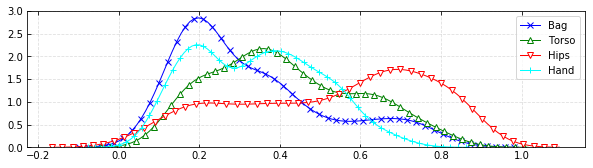

In [8]:
# histogram of models performances on each generator over all experiments
revisions = {
    'Bag': [
        (1, 'Bag'),
        
        (2, 'Bag-User1'),
        (2, 'Bag-User2'),
        (2, 'Bag-User3'),
        
        (4, 'Bag-User1'),
        (4, 'Bag-User2'),
        (4, 'Bag-User3'),
    ],
    'Hand': [
        (1, 'Hand'),
        
        (2, 'Hand-User1'),
        (2, 'Hand-User2'),
        (2, 'Hand-User3'),

        (4, 'Hand-User1'),
        (4, 'Hand-User2'),
        (4, 'Hand-User3'), 
    ],
    'Hips': [
        (1, 'Hips'),
        
        (2, 'Hips-User1'),
        (2, 'Hips-User2'),
        (2, 'Hips-User3'),
        
        (4, 'Hips-User1'),
        (4, 'Hips-User2'),
        (4, 'Hips-User3'),
    ],
    'Torso': [
        (1, 'Torso'),
        
        (2, 'Torso-User1'),
        (2, 'Torso-User2'),
        (2, 'Torso-User3'),
        
        (4, 'Torso-User1'),
        (4, 'Torso-User2'),
        (4, 'Torso-User3'),
    ]
}
plt.figure(figsize=(10, 2.5))
fig = histogram_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('Recognition performances')
fig.get_axes()[0].set_ylabel('Models')
fig.suptitle('Histogram of recognition performances\n on each generator over all experiments')
fig.savefig("./histograms/histogram_of_each_generator_overAllExperiments.svg", format="svg")

('len(data) = ', 1)
('len(data) = ', 2)
('len(data) = ', 3)
blue
green
red


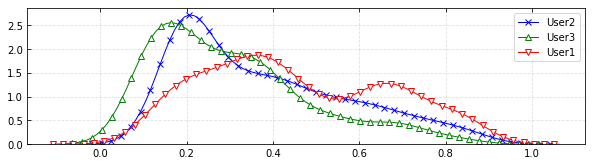

In [9]:
# histogram of models performances of each user over all experiments
revisions = {
    'User1': [
        (2, 'Bag-User1'),
        (4, 'Bag-User1'),
        (2, 'Hand-User1'),
        (4, 'Hand-User1'),
        (2, 'Hips-User1'),
        (4, 'Hips-User1'),
        (2, 'Torso-User1'),
        (4, 'Torso-User1'),
    ],
    'User2': [
        (2, 'Bag-User2'),
        (4, 'Bag-User2'),
        (2, 'Hand-User2'),
        (4, 'Hand-User2'),
        (2, 'Hips-User2'),
        (4, 'Hips-User2'),
        (2, 'Torso-User2'),
        (4, 'Torso-User2'),
    ],
    'User3': [
        (2, 'Bag-User3'),
        (4, 'Bag-User3'),
        (2, 'Hand-User3'),
        (4, 'Hand-User3'),
        (2, 'Hips-User3'),
        (4, 'Hips-User3'),
        (2, 'Torso-User3'),
        (4, 'Torso-User3'),        
    ]
}
plt.figure(figsize=(10, 2.5))
fig = histogram_overAllExperiments(revisions)
fig.get_axes()[0].set_xlabel('Recognition performances')
fig.get_axes()[0].set_ylabel('Models')
fig.suptitle('Histogram of recognition performances\n on each user over all experiments')
fig.savefig("./histograms/histogram_of_each_user_overAllExperiments.svg", format="svg")